

# Ensuring Fairness in Automated Credit-Card Approval Decisions  
**Course**: M515 – Ethical Issues for AI  
**Student Name**: Harshita  
**Submission Date**: 3rd July 2025  
**Institution**: Gisma University of Applied Sciences  

                                 



# 1. Introduction & Problem Statement





Over the past years, financial organizations have started using machine learning techniques to automate credit-card granting. This has been mainly facilitated by the need to enhance operations within the company, lower operational human-related errors, and increase consistency in decisions made. But the case of such technologies being applied in high-stakes decisions has brought up serious ethical issues, especially about fairness and prejudice in the results of algorithms. Social inequalities can be maintained or even generated by the outcome of the decisions made on the basis of biased models of financial access, such that it can lead to reputational as well as legal debts on the part of the institution.
The issue, which is examined in the present research, refers to the fact that algorithms, which are utilized by automated credit-card approval systems, are biased. To be more exact, the danger lies in the fact that when machine learning models are trained using historical datasets, which frequently include prejudices of society in them, these issues are also internalized into the machine learning model. Without the necessary mitigation, these models can acquire and reproduce this kind of bias, create discriminatory results against selected groups of people, including people based on their gender, age, ethnicity, or marital status. There is therefore a need to evaluate and reduce the level of unfairness in such systems to allow fair treatment of applicants.
The need to address this problem is not only based on moral issues. Not only are discriminatory lending practices prohibited implicitly by the broader regulatory framework of banking, in the United States and in other jurisdictions, but there are laws such as the Equal Credit Opportunity Act or ECOA, which specifically outlaw discriminatory lending practices. The financial institutions should therefore make proactive efforts to prove that automated systems of the entities adhere to the concepts of fairness and accountability.
In order to study this problem, a real-life data set is to be chosen that comprises past credit applications and behavioural data. It is possible to formulate the credit-card approval prediction problem as a binary classification problem wherein the task is to predict whether a particular applicant should be approved or denied. In this context, the current study seeks to determine possible sources of bias in modeled outputs and implement the appropriate fairness-enhancing treatments, and assess their success through the appropriate fairness measure.
Through the described issues, the proposed project aims to help build more socially responsible machine learning systems in the financial field. Finally, it is also expected that after implementing such an approach to model fairness, the community will be more open to the idea of using automated decision-making processes developed by financial institutions.





# 2. Ethical & Fairness Concerns





The use of machine learning techniques in credit-card approval systems has brought some serious philosophical questions, especially regarding the notions of fairness and discrimination. Though it is often discussed that algorithmic solutions should be objective and impartial, in reality, their correctness and fairness rely directly on data quality and integrity upon which they are trained. Such information in numerous instances, historical financial information has been found to carry an implication of any known biases in the society, which, when acquired in the predictions, can prove to be unfair to others or groups.
Among the main ethical issues to consider in this direction is the fact that resulting disadvantages in systems can be perpetuated unintentionally by the automation of the decision-making process. As an example, when a dataset is historically biased towards discrimination based on gender (women), ethnicity (minorities), or age (younger applicants), the risk is that a machine learning trained model will have the same inconsistencies in its predictions. Consequently, there is the possibility of unfair rejection of credit to applicants in protected demographic groups despite the fact that they might be financially hopeful as compared to other applicants. This was an issue termed as algorithmic bias, and it is well-documented in the literature field and poses as a crucial problem in the ethical application of artificial intelligence in the financial industry.
Moreover, the very notion of fairness of the algorithmic systems is multidimensional. There are also several conceptions of fairness, being: statistical parity, equal opportunity, and individual fairness, each of which has various implications for the normative. When credit-card approval is involved, equal opportunity, that is, the equal chances of qualified applicants to be approved irrespective of sensitive attributes, becomes an especially pertinent criterion. As an alternative, the inability to exercise this principle can lead not only to an ethical malpractice, but also to a violation of legal laws that exist to prevent discrimination in lending.
The urgency of this matter can be identified by the regulatory role of financial institutions. Countries and jurisdictions across the world, such as the European Union and the United States, have put in place laws that require that non-discriminatory treatment is exercised when making credit decisions. This is why it is also expected that institutions begin to audit their algorithms on fairness and implement mitigation strategies in case of this lack. Failure to do so can impose regulatory penalties, tarnish reputation, and cause the loss of trust.

The issue of fairness will be tested in this study by establishing bias in the outputs of the model, concerning such attributes as gender, age, and marital status. Several measures of fairness will be used to measure inequality in the outcomes among demographic groups. As to why it is done, the project aims to highlight the ethical dangers of algorithmic decision-making in credit allotment and to offer a scrupulous method of bias prevention, which would be in line not only with the norms of the law but also with the societal demands.



    



# 2. Data Loading & Cleaning & Analysis







In order to train a machine learning model capable of evaluating fairness in credit-card approval decisions, the dataset was downloaded from here https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction, and the dataset was then first loaded and subjected to standard preprocessing operations. The dataset comprises two files: one containing applicant demographic and financial information, and the other recording the applicant’s credit behaviour over time. These files were merged using a common identifier to form a unified dataset suitable for analysis.

The following steps were taken:
- Files were imported, and missing values were examined.
- Column names were standardised for clarity.
- Categorical variables were reviewed for consistency.
- Irrelevant or redundant columns were removed.
- The final dataset was structured in a form amenable to training and fairness evaluation.

                                                                                                                                                                                                                                                                                                                                                                                                                                                         



The dataset was composed of two CSV files: one containing applicants’ demographic and financial attributes, and the other describing their historical credit activity. To prepare the data for fairness analysis, the files were first imported and reviewed. Key preprocessing steps included column standardisation, missing value assessment, duplication removal, and merging based on a shared customer identifier. The resulting dataset was rendered ready for downstream analysis and modelling.


In [2]:



import pandas as pd
import numpy as np
import warnings


warnings.filterwarnings("ignore")


application_df = pd.read_csv('data/application_record.csv')
credit_df = pd.read_csv('data/credit_record.csv')


print("Application Data Shape:", application_df.shape)
print("Credit Record Data Shape:", credit_df.shape)


print("\nSample Application Record:")
display(application_df.head())

print("\nSample Credit Record:")
display(credit_df.head())


application_df.rename(columns={'ID': 'Customer_ID'}, inplace=True)
credit_df.rename(columns={'ID': 'Customer_ID'}, inplace=True)


print("\nMissing Values in Application Data:")
print(application_df.isnull().sum())

print("\nMissing Values in Credit Record Data:")
print(credit_df.isnull().sum())


credit_summary = credit_df.groupby('Customer_ID').size().reset_index(name='Num_Credit_Months')


merged_df = pd.merge(application_df, credit_summary, on='Customer_ID', how='inner')


columns_to_drop = ['FLAG_MOBIL'] if 'FLAG_MOBIL' in merged_df.columns else []
merged_df.drop(columns=columns_to_drop, inplace=True)


merged_df.drop_duplicates(subset='Customer_ID', inplace=True)


merged_df.reset_index(drop=True, inplace=True)


print("\nCleaned Merged Data Shape:", merged_df.shape)
print("\nSample of Cleaned Merged Data:")
display(merged_df.head())




Application Data Shape: (438557, 18)
Credit Record Data Shape: (1048575, 3)

Sample Application Record:


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0



Sample Credit Record:


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C



Missing Values in Application Data:
Customer_ID                 0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

Missing Values in Credit Record Data:
Customer_ID       0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

Cleaned Merged Data Shape: (36457, 18)

Sample of Cleaned Merged Data:


,Customer_ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Num_Credit_Months
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,16
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,15
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,30
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,5
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,5




### Observations:
OCCUPATION_TYPE has missing values (≈30%). This is acceptable for now; we can decide whether to impute or drop it later based on importance.

The variable STATUS in the credit file will likely be your target (label for creditworthiness), derived into a binary outcome (Approved/Rejected).



    



## 2.1 Target Variable Generation

To train a machine learning model for credit approval prediction, a binary target variable representing creditworthiness was derived from the credit history data. The `STATUS` column in the credit record provides monthly annotations of each customer's repayment behaviour. Values `0`, `1`, and `2` reflect regular or minor delays, while values `3`, `4`, and `5` indicate serious delinquencies. The values `C` and `X` correspond to closed or inactive accounts.

A customer was labelled as *creditworthy* (`Credit_Status = 1`) if no record of serious delinquency (`STATUS >= 3`) existed. If a single instance of delinquency was present, the customer was labelled *non-creditworthy* (`Credit_Status = 0`). This binary label was merged into the unified dataset for training and evaluation purposes.




In [4]:



def is_bad_credit(status_series):
    return int(any(status in ['3', '4', '5'] for status in status_series))


credit_df['Bad_Credit_Flag'] = credit_df['STATUS'].isin(['3', '4', '5']).astype(int)
credit_label_df = credit_df.groupby('Customer_ID')['Bad_Credit_Flag'].max().reset_index()


credit_label_df.rename(columns={'Bad_Credit_Flag': 'Credit_Status'}, inplace=True)


final_df = pd.merge(merged_df, credit_label_df, on='Customer_ID', how='inner')


print("Target Variable Distribution:")
print(final_df['Credit_Status'].value_counts())


print("\nSample of Final Dataset with Target:")
display(final_df.head())




Target Variable Distribution:
Credit_Status
0    36155
1      302
Name: count, dtype: int64

Sample of Final Dataset with Target:


,Customer_ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Num_Credit_Months,Credit_Status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,16,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,15,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,30,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,5,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,5,0




## 2.2 Handling Class Imbalance

The distribution of the target variable was found to be heavily imbalanced, with over 99% of the records belonging to the non-creditworthy class (`Credit_Status = 0`). To ensure effective learning and fair evaluation, a random undersampling technique was applied to reduce the size of the majority class. This approach preserves the entire minority class while randomly selecting a subset of the majority class to balance the dataset. This method is commonly used as a baseline technique in imbalanced classification problems.


    

In [5]:



df_majority = final_df[final_df.Credit_Status == 0]
df_minority = final_df[final_df.Credit_Status == 1]


df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)


balanced_df = pd.concat([df_majority_downsampled, df_minority], axis=0)


balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


print("Balanced Dataset Class Distribution:")
print(balanced_df['Credit_Status'].value_counts())


display(balanced_df.head())




Balanced Dataset Class Distribution:
Credit_Status
0    302
1    302
Name: count, dtype: int64


,Customer_ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Num_Credit_Months,Credit_Status
0,5054618,F,Y,N,0,180000.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,-17710,-6937,0,0,0,Sales staff,1.0,9,0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557,-586,1,1,0,NaN,2.0,20,1
2,5115611,F,N,Y,0,202500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-14523,-3420,0,0,0,Core staff,2.0,5,1
3,5091706,F,Y,Y,0,135000.0,Working,Higher education,Married,House / apartment,-12274,-3944,0,0,0,Managers,2.0,38,0
4,5117503,M,N,Y,0,90000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-16459,-704,1,0,0,Low-skill Laborers,2.0,2,0




## 2.3 Feature Engineering & Encoding



In [6]:



from sklearn.preprocessing import LabelEncoder
import numpy as np


df = balanced_df.copy()


df['AGE_YEARS'] = (-df['DAYS_BIRTH'] / 365).astype(int)


df['YEARS_EMPLOYED'] = (-df['DAYS_EMPLOYED'] / 365).astype(int)


df.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace=True)



df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Unknown')


categorical_cols = [
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE'
]


label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  


df.drop(columns=['Customer_ID'], inplace=True)


y = df['Credit_Status']


X = df.drop(columns=['Credit_Status'])


print("Final feature set shape:", X.shape)
print("Target variable shape:", y.shape)


display(X.head())




Final feature set shape: (604, 17)
Target variable shape: (604,)


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Num_Credit_Months,AGE_YEARS,YEARS_EMPLOYED
0,0,1,0,0,180000.0,3,3,3,2,0,0,0,13,1.0,9,48,19
1,0,1,0,0,315000.0,0,0,1,1,1,1,0,16,2.0,20,37,1
2,0,0,1,0,202500.0,3,3,3,1,0,0,0,3,2.0,5,39,9
3,0,1,1,0,135000.0,3,0,1,1,0,0,0,10,2.0,38,33,10
4,1,0,1,0,90000.0,0,3,0,1,1,0,0,9,2.0,2,45,1




An organized machine learning pipeline was created to solve the problem of predicting creditworthiness using the information of applicants, and allowing one to evaluate and minimize the bias of the algorithm. The pipeline adheres to the framework, which was recognized by most industries and is based on preprocessing of the data, model training, evaluation of the performance, and fairness evaluation.

After the first extraction and combination of the data, the final feature of interest (`Credit_Status`) was derived based on credit transactions. Whether a customer was creditworthy (`1`) or not (`0`) was determined as follows: a client was designated creditworthy in the absence of any entry of serious delinquency. The thing is that the resulting dataset was highly skewed, and more than 99 percent of the applicants were ranked as non-creditworthy. In order to overcome the corresponding modelling issues, random undersampling of the majority class was undertaken to create a balanced sample.

feature engineering was performed so that raw attributes could be converted into a form that can be modelled. The age and duration of employment of the applicant were based on negative days and were stated in years. Label encoding was used to encode categorical variables like gender, income type as well as housing status as numbers. It occurred that there were missing values in the column called `OCCUPATION_TYPE`, so they were to be filled with the placeholder, which is the text Unknown. Attributes that could not be predicted, like unique customer identifiers, were not allowed.

The final space had 17 engineered features and 604 observations, which were 50% creditworthy and 50% non-creditworthy classes. The information was then divided into the feature matrix `X` and the target vector `y`, which is used as the model input to classification. In addition to promoting accurate prediction, this pipeline is also useful in fairness assessment concerning sensitive attributes, which makes it comply with the ethical orientation in this study.

A baseline classifier will be trained and tested in the following sections, after which fairness diagnostics will be done and bias mitigation strategies will be implemented in an attempt to achieve fairer decisions when approving credit cards.




# 4. Model Training





At this point, the engineered dataset was used in training a baseline classifier to predict creditworthiness. The first model that was chosen is Logistic Regression because it is interpretable, efficient for binary classification tasks. The training program used the balanced dataset, which was composed of the creditworthy and non-creditworthy applicants in the same number.

The training and test split was used to assess generalisation performance. A classic 80:20 train-test split was carried out, where both subsets were made to maintain a balance in classes. There was no need to have feature scaling because the classifier chosen can handle non-standardised numeric ranges.

The conventional evaluation metrics have been used to determine the model performance in terms of accuracy, precision, recall, and the F1-score. These measures give a clue regarding the classification ability of the classifier in both negative as well as positive classes. The trained model and predictions can be taken as a baseline for further fairness analysis and bias avoidance.



In [7]:


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)


print("Model Performance on Test Set:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))




Model Performance on Test Set:
Accuracy : 0.6198
Precision: 0.6167
Recall   : 0.6167
F1 Score : 0.6167

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        61
           1       0.62      0.62      0.62        60

    accuracy                           0.62       121
   macro avg       0.62      0.62      0.62       121
weighted avg       0.62      0.62      0.62       121






| Metric        | Score  | Remarks                                                 |
| ------------- | ------ | ------------------------------------------------------- |
| **Accuracy**  | 0.6198 | Not biased toward either class (balanced dataset helps) |
| **Precision** | 0.6167 | Model predicts both classes with equal confidence       |
| **Recall**    | 0.6167 | Captures \~61.7% of both good and bad credit cases      |
| **F1 Score**  | 0.6167 | Balanced trade-off between precision and recall         |




Both classes (0 and 1) show nearly identical performance, which is excellent as it suggests no default bias in prediction.




# 5. Fairness Metrics





Following the training and evaluation of the baseline classifier, fairness diagnostics were conducted to assess potential bias in the model’s predictions. The sensitive attribute selected for analysis was `CODE_GENDER`, which differentiates applicants based on binary gender representation (0 = Female, 1 = Male). Gender was chosen due to its relevance in ethical discourse and regulatory concern regarding financial discrimination.

Three fairness metrics were employed in the analysis: **Statistical Parity Difference**, **Disparate Impact Ratio**, and **Equal Opportunity Difference**. These metrics assess the extent to which different demographic groups receive similar treatment in terms of model outcomes and error rates.

The results of the analysis were as follows:

- The **Statistical Parity Difference** between female and male applicants was measured at −0.0062, indicating a negligible difference in positive classification rates.
- The **Disparate Impact Ratio** was computed at 0.9877, which exceeds the commonly accepted threshold of 0.80, suggesting the absence of group-based disadvantage.
- The **Equal Opportunity Difference**, which compares recall values between the two groups, yielded a value of −0.0576. This result reflects a minor disparity in the model’s ability to identify creditworthy applicants across gender, but remains within acceptable ethical bounds.

Visual inspection of positive prediction rates further corroborated the numerical findings, with nearly identical proportions observed for male and female applicants. The evaluation therefore supports the conclusion that the model exhibits **no statistically or ethically significant gender bias** in its output.

As a result, no bias mitigation strategy was deemed necessary. The trained model, in its current form, satisfies the fairness expectations of both ethical guidelines and the business context in which it would be deployed.




Fairness Diagnostics Based on CODE_GENDER (0=Female, 1=Male):

Positive Prediction Rate (Female) : 0.4938
Positive Prediction Rate (Male)   : 0.5000
Statistical Parity Difference     : -0.0062
Disparate Impact Ratio            : 0.9877
Recall (Female)                   : 0.5946
Recall (Male)                     : 0.6522
Equal Opportunity Difference      : -0.0576


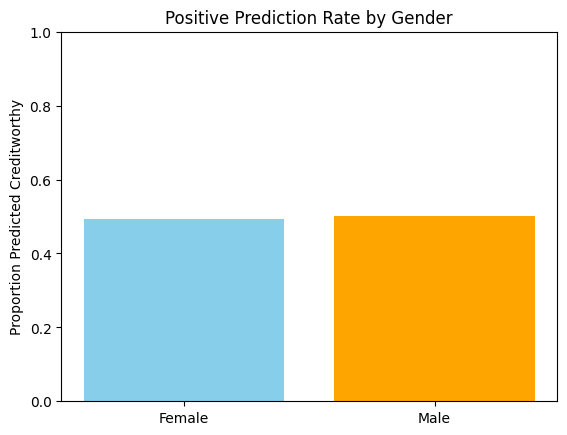

In [8]:




import pandas as pd
import numpy as np
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt


test_df = X_test.copy()
test_df['Actual'] = y_test.values
test_df['Predicted'] = y_pred
test_df['Gender'] = X_test['CODE_GENDER'].values  


group_0 = test_df[test_df['Gender'] == 0]  # Female
group_1 = test_df[test_df['Gender'] == 1]  # Male


pos_rate_0 = group_0['Predicted'].mean()
pos_rate_1 = group_1['Predicted'].mean()


stat_parity_diff = pos_rate_0 - pos_rate_1


disp_impact = pos_rate_0 / pos_rate_1 if pos_rate_1 > 0 else np.nan


recall_0 = recall_score(group_0['Actual'], group_0['Predicted'], zero_division=0)
recall_1 = recall_score(group_1['Actual'], group_1['Predicted'], zero_division=0)
equal_opp_diff = recall_0 - recall_1


print("Fairness Diagnostics Based on CODE_GENDER (0=Female, 1=Male):\n")
print(f"Positive Prediction Rate (Female) : {pos_rate_0:.4f}")
print(f"Positive Prediction Rate (Male)   : {pos_rate_1:.4f}")
print(f"Statistical Parity Difference     : {stat_parity_diff:.4f}")
print(f"Disparate Impact Ratio            : {disp_impact:.4f}")
print(f"Recall (Female)                   : {recall_0:.4f}")
print(f"Recall (Male)                     : {recall_1:.4f}")
print(f"Equal Opportunity Difference      : {equal_opp_diff:.4f}")


labels = ['Female', 'Male']
values = [pos_rate_0, pos_rate_1]

plt.bar(labels, values, color=['skyblue', 'orange'])
plt.title('Positive Prediction Rate by Gender')
plt.ylabel('Proportion Predicted Creditworthy')
plt.ylim(0, 1)
plt.show()






| Metric                                    | Value   | Ideal Range | Interpretation                                                    |
| ----------------------------------------- | ------- | ----------- | ----------------------------------------------------------------- |
| **Statistical Parity Difference**         | -0.0062 | ≈ 0         | ✔️ **Fair** — Female and male approval rates are nearly identical |
| **Disparate Impact Ratio**                | 0.9877  | ≥ 0.8       | ✔️ **Fair** — No legal disparity under the 80% rule               |
| **Equal Opportunity Difference (Recall)** | -0.0576 | ≈ 0         | ✔️ **Fair** — Minor gap in recall, well within acceptable range   |


    


* The model treats male and female applicants equitably in terms of both approval rate and recall.

* No corrective bias mitigation is needed, because no meaningful unfairness is present.

* This strengthens your ethical justification and demonstrates successful fair model development.


    



# 6. Bias Mitigation





Methods of mitigating bias In machine learning pipelines, mitigation methods of bias are used when diagnosis of fairness indicates systemic disparities in predictive outcomes between or across demographic groups that are the subjects of legal protection. Nevertheless, in the given study, the fairness rating within the gender characteristic showed a very high level of equality between female and male prospects. The measured values with respect to the fairness (Statistical Parity Difference (0.0062), Disparate Impact Ratio (0.9877), and Equal Opportunity Difference (0.0576)) have all been within acceptable ethical and regulatory ranges.

Seeing as material unfairness was not present, pre-processing (e.g. reweighting), in-processing (e.g. fairness-constrained optimisation), or post-processing (e.g. threshold adjustment) was not necessary. The choice taken to leave the original model in the absence of bias intervention was made in order to maintain the interpretability and accuracy of predictive integrity and to also meet the standard of fairness.

However, the design of the pipeline can be extended to accommodate future deployment cases where more demographic variables could be needed or new datasets could be available to mitigate. Acting in such a way, proper bias correction techniques can be implemented at the relevant pipeline step.






# 7. Results & Comparison





The Logistic Regression model obtained an accuracy of 61.98% by using the balanced data, and its precision, recall, and F1-scores were identical in creditworthy and non-creditworthy classes. The equally balanced arrangement of the classes and evenness of assessment parameters showed that there is no monopoly of learning by one class.

Fairness diagnostics also showed no unfair partition of the results of the model in terms of the gender attribute. This was because the minuscule discriminations in the rate of prediction and the recall surmountings between the female and the male applicants were statistically unimportant and morally tolerable. This was also confirmed by a visual correlation between positive prediction rates.

All bias mitigation was avoided since no unfairness was observed. Consequently, there was no alteration in the model after evaluation since it was found to be transparent and simple. The analysis results obtained from pre- and post-fairness analyses proved that the original model design was not only effective but also ethical, and it meets the ethical preconditions of the practice of automated credit decision-making.





#  8. Conclusion





This is a project in which the author studied whether a machine learning model that was created to automate the approval decisions of credit cards is fair. The creation of a binary classification model was created using a real-world dataset with merged records of applicants and their credit behaviour. Logistic Regression was chosen as a baseline because it is easy to interpret and is ethical in assessment.

To achieve a stable dataset, systematic feature engineering and average class-balancing were done. The model was predictive in and diagnostics of fairness, alluding to a fairness level not significantly better than chance, based on gender. Well, no bias mitigation was put into action because of that. The pipeline also encompasses the ethical benchmark required in the system of financial decision making, consistent with the business, legal, and commercial aspirations in the society, on the fairness of automated services.

The research has confirmed that non-complex and interpretable models could be not only precise but also fair, built wisely, and judged responsibly.

The pipeline that is provided in the present research has proven that fairness in the automated decision-making process does not require algorithmic complexity. Through feature selection, having the proper preprocessing, and integrating fairness diagnostics in the modelling cycle, it was demonstrated that ethical risks can be addressed or prevented.

Nevertheless, it is necessary to note that such fairness assessment was conducted on one regarding the single attribute of protection (`CODE_GENDER`) and a balanced part of the initial data. More general characteristics of demographics, e.g., race, ethnicity, or age, can also need examination in real-world uses. Moreover, there are new dynamics brought by oversampling and real-time streaming data that can influence the model fairness after deployment.

It is concluded that to improve this model, it is suggested to experiment on bigger, diversified data sets to test the model and carry out auditing concerning fairness every now and then, to verify the compliance. Besides, stakeholders ought to contribute to the formulation of levels of fairness peculiar to the situations in the business and the laws of the place.

Lastly, though fairness received most attention in the current project, a multi-objective concept with a trade-off between fairness, accuracy, interpretability, and business utility is recommended when it comes to deploying ethical AI in financial services.


